# Finance Data Project

In this data project, we will focus on **Exploratory data analysis (EDA)** of stock prices. We will focus on bank stocks and examine their progression from the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) through early 2024.

## Disclaimer

Keep in mind, this project is meant to practice visualization and pandas skills; it is not intended to be a robust financial analysis or to be taken as financial advice.


## Get the Data
- read data from Yahoo finance using pandas!

- pip command to install yahoo finance:
    - pip install yfinance

In [23]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import time
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**Get the stock data from Jan 1st 2006 to Jan 1st 2024 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Grab info on the stock.

**Use yahoo finance as a source, for example:**
    
    # Bank of America
    BAC = yf.download(ticker, start, end)

### Ticker Symbol:
A "ticker" or "ticker symbol" is a unique series of letters assigned to a security or stock for trading purposes. Ticker symbols are used to identify and trade securities on stock exchanges. For example, "GE" is the ticker symbol for General Electric.

In [2]:
# start = 01 Jan 2006
start = datetime.datetime(2006, 1, 1)
# end = 01 Jan 2024
end = datetime.datetime(2024,1,1)

print(start)
print(end)

2006-01-01 00:00:00
2024-01-01 00:00:00


In [3]:
# Define the ticker symbol for General Electric
ticker = 'GE'

# Get historical stock data from Yahoo Finance for the specified date range
GE = yf.download(ticker, start=start, end=end)

# Display the dataframe
GE

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,168.214554,169.652283,166.776825,169.508514,93.532684,6932005
2006-01-04,169.412659,169.652283,168.214554,169.268890,93.400436,5011458
2006-01-05,169.029266,169.412659,168.214554,168.837570,93.162445,3934887
2006-01-06,169.556442,170.275299,168.645874,169.987747,93.797089,4608094
2006-01-09,169.652283,169.796051,168.885498,169.556442,93.559120,4322644
...,...,...,...,...,...,...
2023-12-22,101.667999,102.178772,100.702316,101.109337,100.850426,4030650
2023-12-26,101.197128,101.923386,101.069435,101.731842,101.471336,2480063
2023-12-27,101.276932,102.482040,101.237030,102.314445,102.132759,3314310


In [4]:
GE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4529 entries, 2006-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4529 non-null   float64
 1   High       4529 non-null   float64
 2   Low        4529 non-null   float64
 3   Close      4529 non-null   float64
 4   Adj Close  4529 non-null   float64
 5   Volume     4529 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 247.7 KB


In [5]:
start_time = time.time()

# Bank of America
BAC = yf.download(tickers='BAC', start=start, end=end)
# CitiGroup
C = yf.download(tickers='C', start=start, end=end)
# Goldman Sachs
GS = yf.download(tickers='GS', start=start, end=end)
# JPMorgan Chase
JPM = yf.download(tickers='JPM', start=start, end=end)
# Morgan Stanley
MS = yf.download(tickers='MS', start=start, end=end)
# Wells Fargo
WFC = yf.download(tickers='WFC', start=start, end=end)

end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Execution Time: 1.7851901054382324 seconds


**Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [6]:
tickers = ['BAC','C','WFC','GS', 'JPM', 'MS']
tickers.sort()
tickers # alphabetical order

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

**Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [7]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], keys=tickers, axis=1)
bank_stocks.head()

BAC                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2006-01-03  46.919998  47.180000  46.150002  47.080002  31.750565  16296700   
2006-01-04  47.000000  47.240002  46.450001  46.580002  31.413363  17757900   
2006-01-05  46.580002  46.830002  46.320000  46.639999  31.453831  14970700   
2006-01-06  46.799999  46.910000  46.349998  46.570000  31.406635  12599800   
2006-01-09  46.720001  46.970001  46.360001  46.599998  31.426847  15619400   

                     C                                      ...         MS  \
                  Open        High         Low       Close  ...        Low   
Date                                                        ...              
2006-01-03  490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04  488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05  484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06  488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09  486.000000  487.399994  483.000000  483.899994  ...  58.619999   

                                                 WFC                        \
                Close  Adj Close   Volume       Open       High        Low   
Date                                                                         
2006-01-03  58.310001  32.955109  5377000  31.600000  31.975000  31.195000   
2006-01-04  58.349998  32.977718  7977800  31.799999  31.820000  31.365000   
2006-01-05  58.509998  33.068138  5778000  31.500000  31.555000  31.309999   
2006-01-06  58.570000  33.102058  6889800  31.580000  31.775000  31.385000   
2006-01-09  59.189999  33.452461  4144500  31.674999  31.825001  31.555000   

                                            
                Close  Adj Close    Volume  
Date                                        
2006-01-03  31.900000  19.124548  11016400  
2006-01-04  31.530001  18.902723  10870000  
2006-01-05  31.495001  18.881746  10158000  
2006-01-06  31.680000  18.992659   8403800  
2006-01-09  31.674999  18.989655   5619600  

[5 rows x 36 columns]

**Set the column name levels:**

In [8]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [9]:
bank_stocks

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  31.750565  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  31.413363  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  31.453831  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  31.406635  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  31.426847  15619400   
...                ...        ...        ...        ...        ...       ...   
2023-12-22   33.209999  33.669998  33.200001  33.430000  32.995476  37258100   
2023-12-26   33.450001  33.959999  33.369999  33.860001  33.419884  24845400   
2023-12-27   33.799999  33.950001  33.660000  33.840000  33.400146  24498600   
2023-12-28   33.820000  33.970001  33.770000  33.880001  33.439629  21799600   
2023-12-29   33.939999  33.990002  33.549999  33.669998  33.232349  28037800   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   
...                 ...         ...         ...         ...  ...        ...   
2023-12-22    50.730000   51.259998   50.689999   50.860001  ...  92.230003   
2023-12-26    50.880001   51.529999   50.790001   51.340000  ...  92.370003   
2023-12-27    51.139999   51.580002   50.930000   51.459999  ...  92.400002   
2023-12-28    51.400002   51.799999   51.400002   51.520000  ...  93.239998   
2023-12-29    51.560001   51.610001   51.220001   51.439999  ...  93.059998   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  32.955109  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  32.977718  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  33.068138  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  33.102058  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  33.452461  4144500  31.674999  31.825001  31.555000   
...                ...        ...      ...        ...        ...        ...   
2023-12-22   92.410004  90.675598  5800800  49.660000  49.860001  49.090000   
2023-12-26   92.839996  91.097519  2726200  49.160000  49.669998  49.029999   
2023-12-27   93.660004  91.902130  4073200  49.410000  49.570000  49.150002   
2023-12-28   93.639999  91.882507  4089500  49.139999  49.650002  49.090000   
2023-12-29   93.250000  91.499817  4772100  49.349998  49.580002  49.209999   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.124548  11016400  
2006-01-04   31.530001  18.902723  10870000  
2006-01-05   31.495001  18.881746  10158000  
2006-01-06   31.680000  18.992659   8403800  
2006-01-09   31.674999  18.989655   5619600  
...                ...        ...       ...  
2023-12-22   49.180000  48.557816  10448000  
2023-12-26   49.639999  49.011997   8856600  
2023-12-27   49.330002  48.705921  12536700  
2023-12-28   49.480000  48.854023   9872600  
2023-12-29   49.220001  48.597313  11731900  

[4529 rows x 36 colu

----

# EDA

Let's explore the data a bit!

**Max Close price for each bank's stock throughout the time period**

In [10]:
bank_stocks['BAC']["Close"].max()

54.900001525878906

In [11]:
print("Max Close price for each bank's stock throughout the time period: \n")
for ticker in tickers:
    print( ticker, '=' , bank_stocks[ticker]["Close"].max())

Max Close price for each bank's stock throughout the time period: 

BAC = 54.900001525878906
C = 564.0999755859375
GS = 423.8500061035156
JPM = 171.77999877929688
MS = 108.7300033569336
WFC = 65.93000030517578


In [12]:
# Another way
bank_stocks.xs(key="Close",axis=1, level='Stock Info')

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999
...,...,...,...,...,...,...
2023-12-22,33.430000,50.860001,380.649994,167.399994,92.410004,49.180000
2023-12-26,33.860001,51.340000,381.609985,168.389999,92.839996,49.639999
2023-12-27,33.840000,51.459999,384.480011,169.399994,93.660004,49.330002


In [13]:
# max close
bank_stocks.xs(key="Close",axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     423.850006
JPM    171.779999
MS     108.730003
WFC     65.930000
dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [15]:
returns = pd.DataFrame()
returns

""


**We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [18]:
bank_stocks["BAC"]['Close']

Date
2006-01-03    47.080002
2006-01-04    46.580002
2006-01-05    46.639999
2006-01-06    46.570000
2006-01-09    46.599998
                ...    
2023-12-22    33.430000
2023-12-26    33.860001
2023-12-27    33.840000
2023-12-28    33.880001
2023-12-29    33.669998
Name: Close, Length: 4529, dtype: float64

In [19]:
bank_stocks["BAC"]['Close'].pct_change()

Date
2006-01-03         NaN
2006-01-04   -0.010620
2006-01-05    0.001288
2006-01-06   -0.001501
2006-01-09    0.000644
                ...   
2023-12-22    0.006928
2023-12-26    0.012863
2023-12-27   -0.000591
2023-12-28    0.001182
2023-12-29   -0.006198
Name: Close, Length: 4529, dtype: float64

In [21]:
for tick in tickers:
    returns[tick + " Return"] = bank_stocks[tick]['Close'].pct_change()

In [22]:
returns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2023-12-22,0.006928,0.005138,0.000210,-0.000597,-0.002375,-0.005460
2023-12-26,0.012863,0.009438,0.002522,0.005914,0.004653,0.009353
2023-12-27,-0.000591,0.002337,0.007521,0.005998,0.008832,-0.006245


**Create a pairplot using seaborn of the returns dataframe.**

C:\Users\Sid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

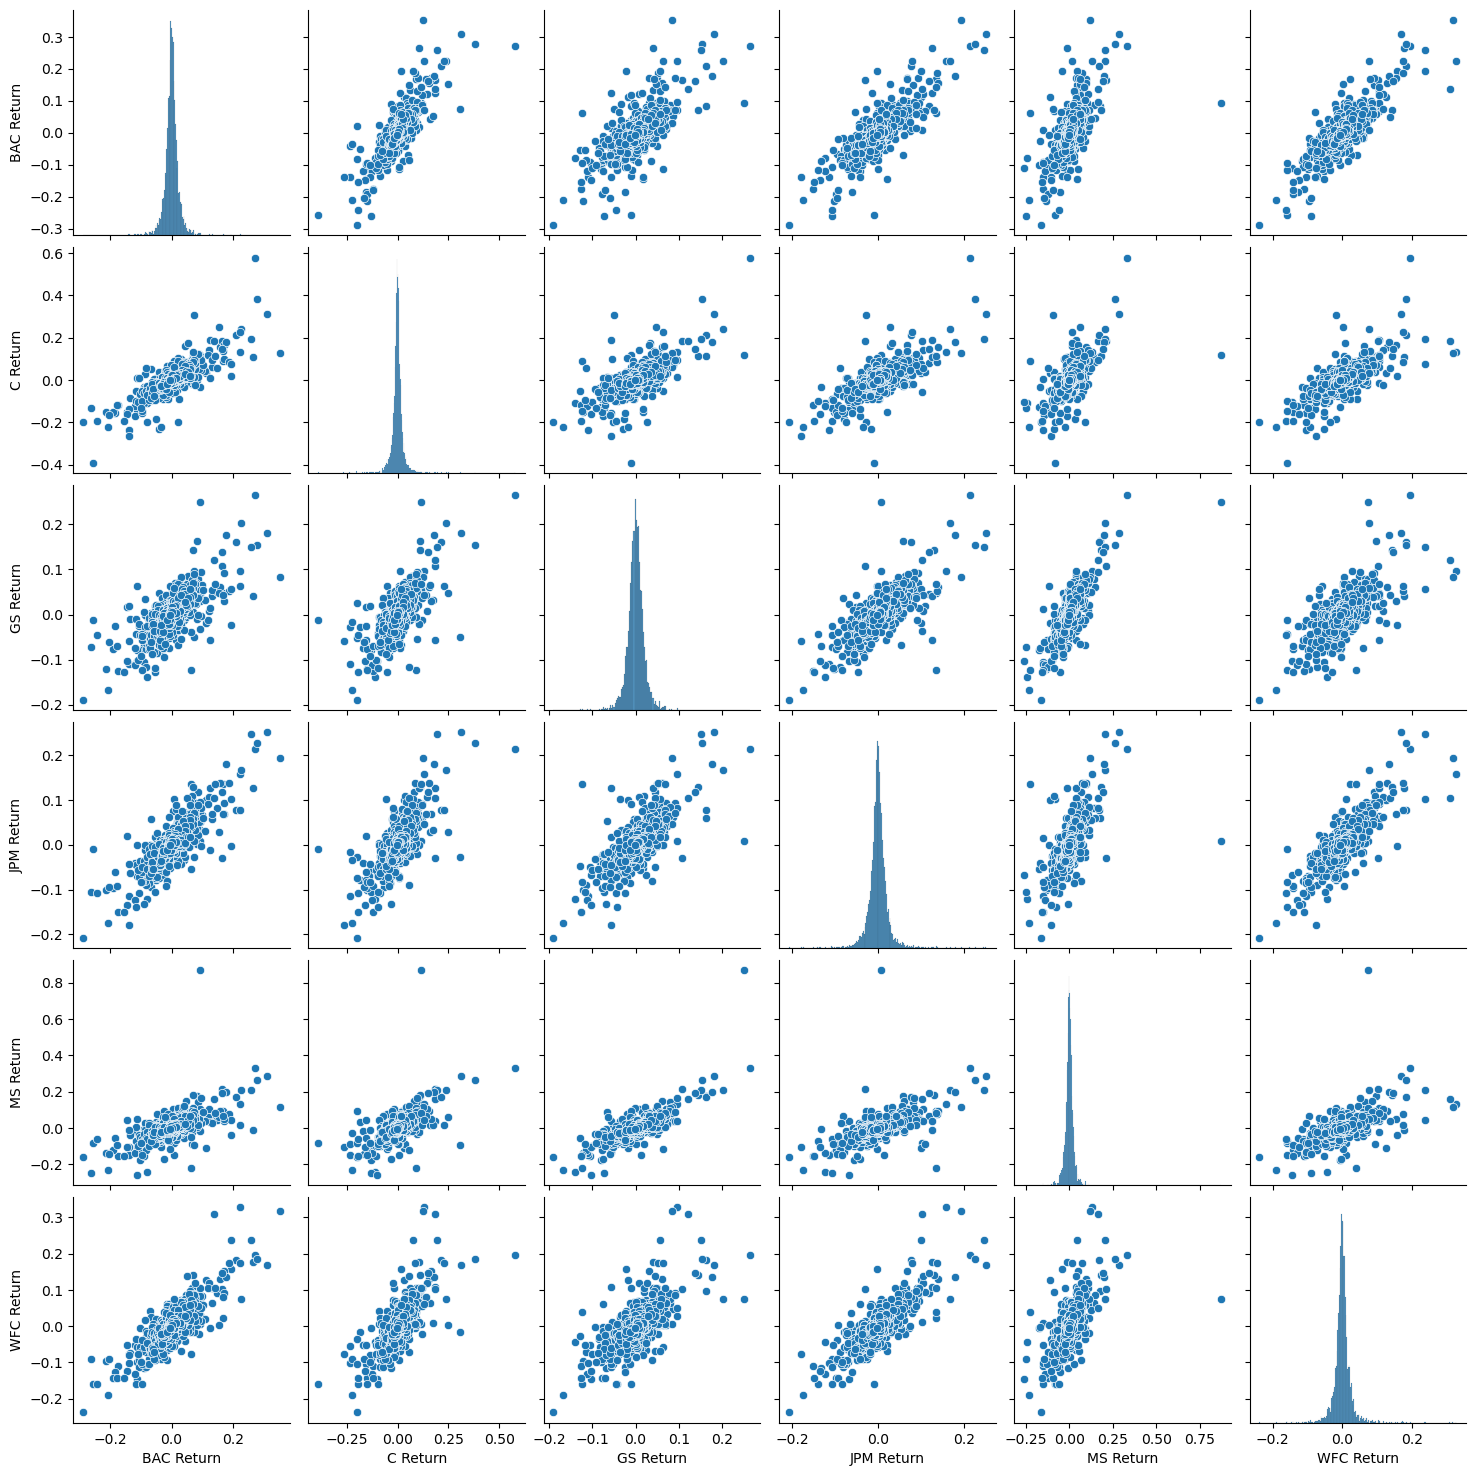

In [24]:
sns.pairplot(returns)

C:\Users\Sid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

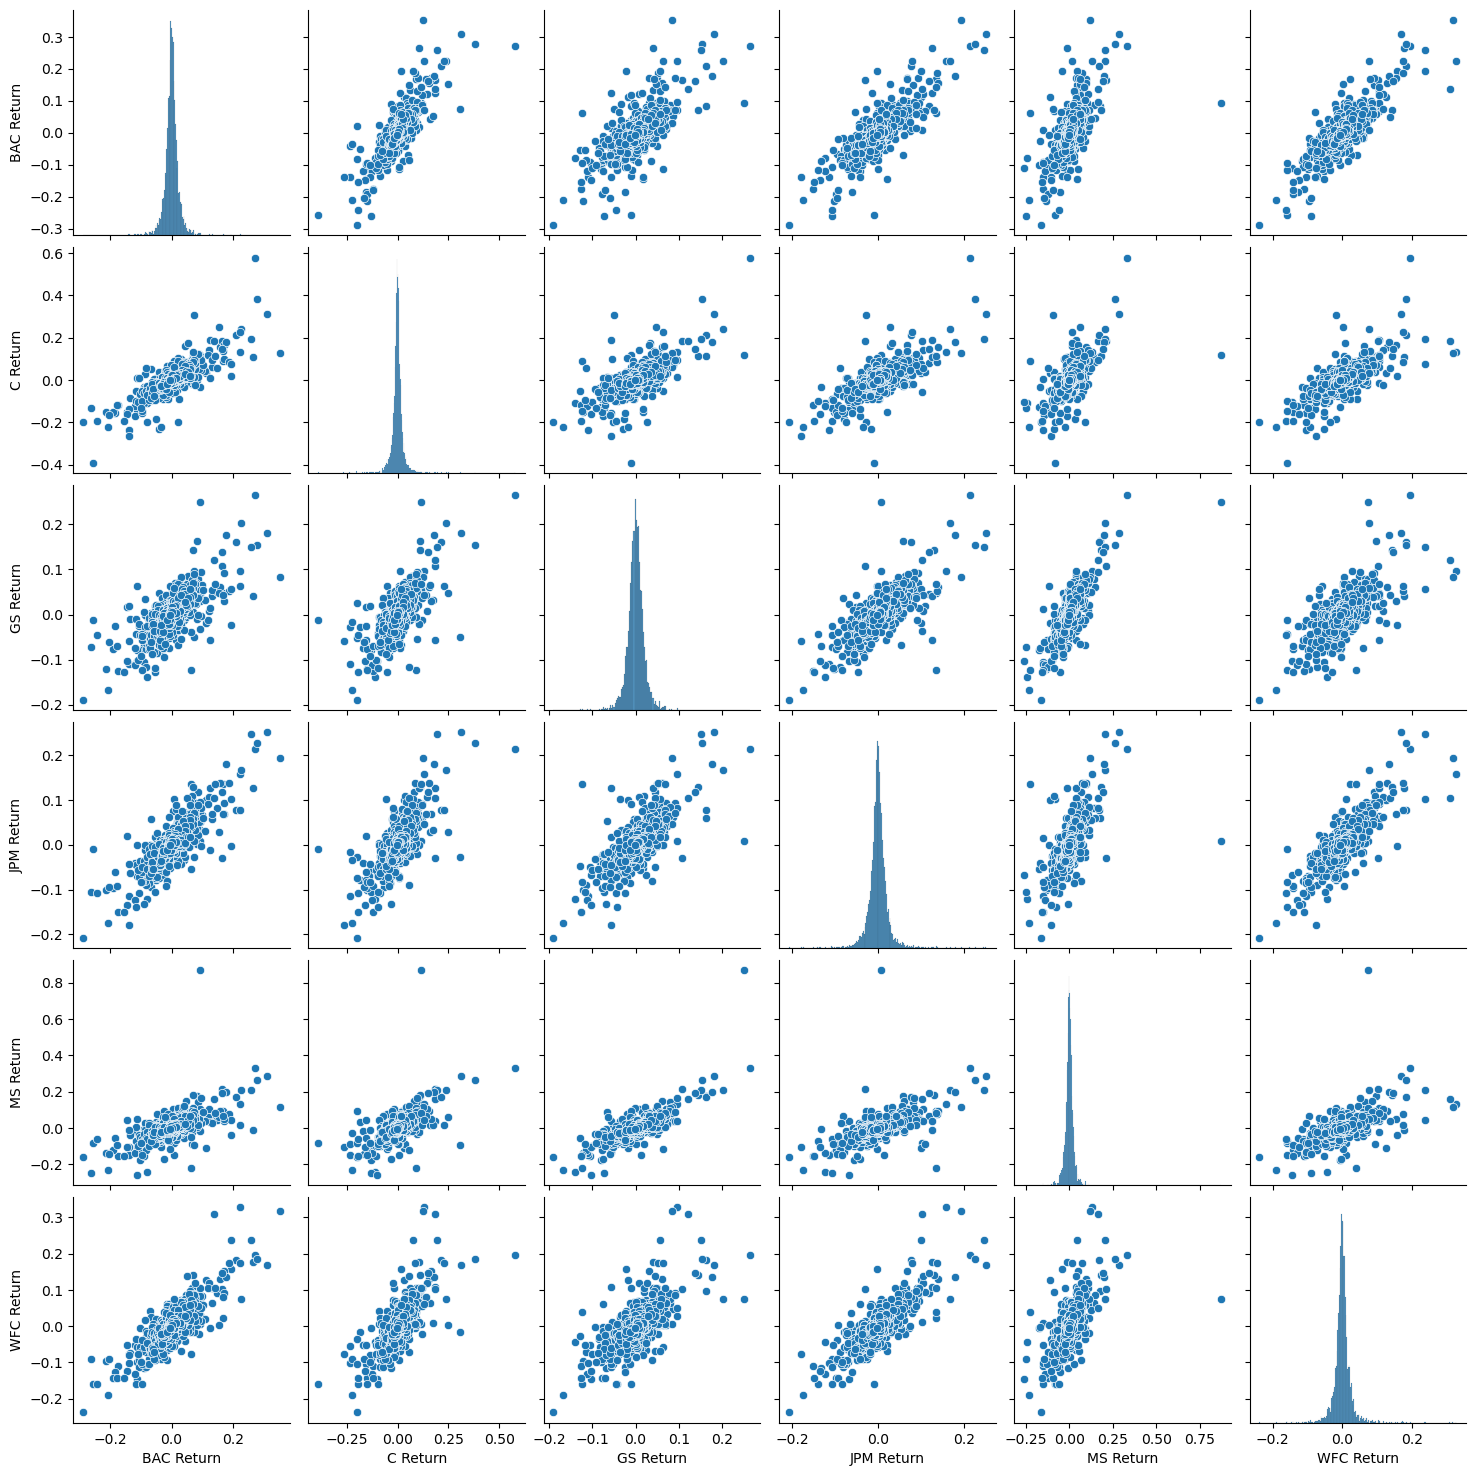

In [25]:
sns.pairplot(returns[1:])